Mounted at /content/drive
1/1 [==============================] - 0s 221ms/step
Training Bernoulli Naive Bayes for EfficientNetB3...
Performance metrics for Bernoulli Naive Bayes with EfficientNetB3:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00       105
           2       1.00      1.00      1.00       105
           3       1.00      1.00      1.00       105
           4       1.00      1.00      1.00       105

    accuracy                           1.00       525
   macro avg       1.00      1.00      1.00       525
weighted avg       1.00      1.00      1.00       525

Accuracy: 1.0
Sensitivity: 1.0
Precision: 1.0
F1 Score: 1.0



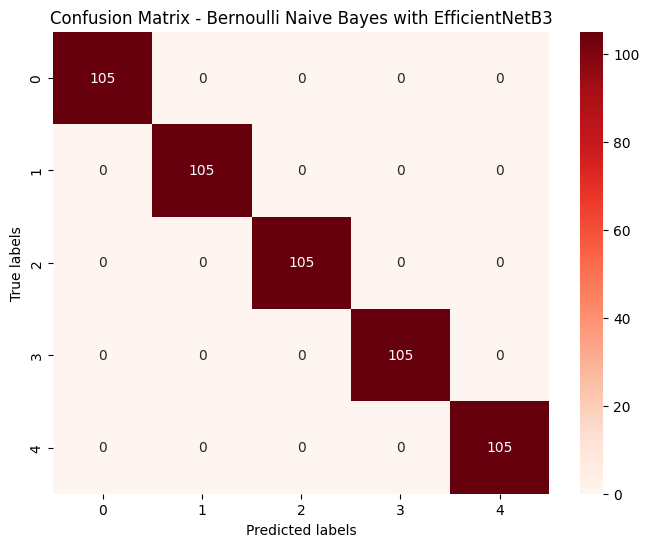

Training Multinomial Naive Bayes for EfficientNetB3...
Performance metrics for Multinomial Naive Bayes with EfficientNetB3:
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.34      0.43       105
           1       0.31      0.58      0.41       105
           2       0.50      0.17      0.26       105
           3       0.51      0.37      0.43       105
           4       0.40      0.60      0.48       105

    accuracy                           0.41       525
   macro avg       0.46      0.41      0.40       525
weighted avg       0.46      0.41      0.40       525

Accuracy: 0.41333333333333333
Sensitivity: 0.4133333333333334
Precision: 0.461901986213641
F1 Score: 0.4012677772787199



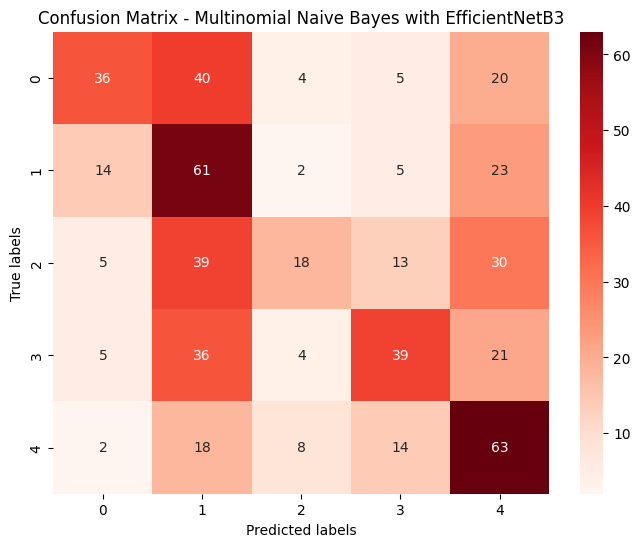

Training Complement Naive Bayes for EfficientNetB3...
Performance metrics for Complement Naive Bayes with EfficientNetB3:
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.30      0.39       105
           1       0.30      0.58      0.40       105
           2       0.50      0.03      0.05       105
           3       0.50      0.34      0.41       105
           4       0.37      0.69      0.48       105

    accuracy                           0.39       525
   macro avg       0.45      0.39      0.35       525
weighted avg       0.45      0.39      0.35       525

Accuracy: 0.38666666666666666
Sensitivity: 0.38666666666666666
Precision: 0.45228904845213763
F1 Score: 0.3470306130659452



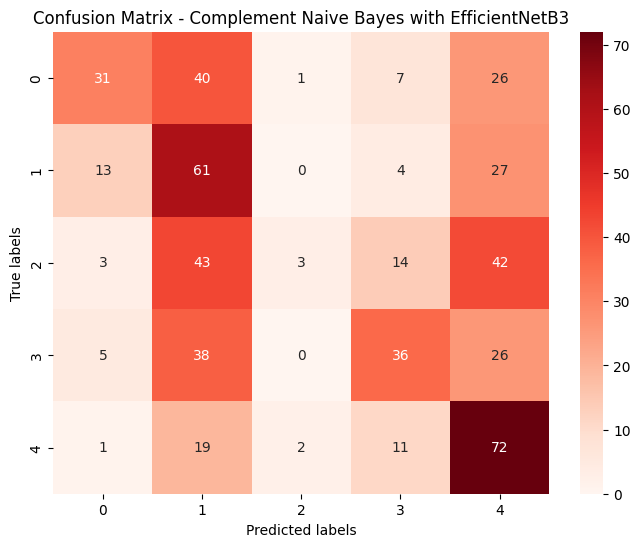

Training Gaussian Naive Bayes for EfficientNetB3...
Performance metrics for Gaussian Naive Bayes with EfficientNetB3:
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       105
           1       0.53      0.96      0.69       105
           2       0.88      0.65      0.75       105
           3       0.87      0.72      0.79       105
           4       0.91      0.78      0.84       105

    accuracy                           0.76       525
   macro avg       0.82      0.76      0.77       525
weighted avg       0.82      0.76      0.77       525

Accuracy: 0.7638095238095238
Sensitivity: 0.7638095238095238
Precision: 0.8209243542801155
F1 Score: 0.7716927470288815



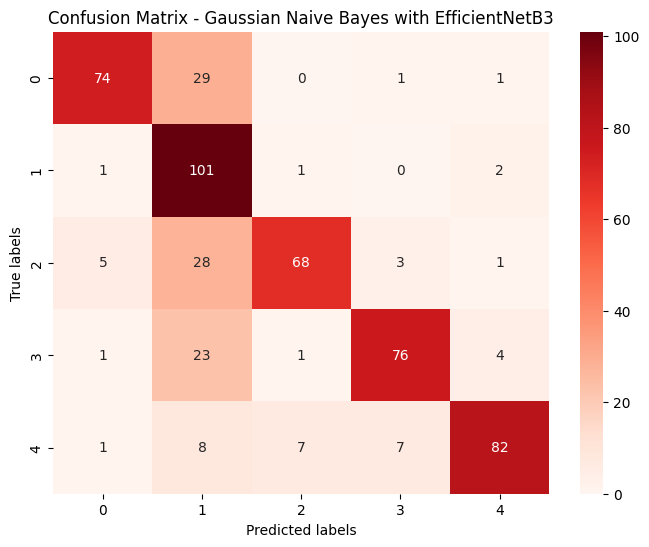

In [1]:
# Import necessary libraries
import os
import numpy as np
from keras.applications import EfficientNetB3
from keras.applications.efficientnet import preprocess_input
from keras.preprocessing import image
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, ComplementNB, GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

# Data directories
train_dir = '/content/drive/MyDrive/A/DR_700/Train'
test_dir = '/content/drive/MyDrive/A/DR_700/Test'

# EfficientNetB3
model_b3 = EfficientNetB3(weights='imagenet', include_top=False)

# Function to extract features from an image using EfficientNetB3
def extract_features_efficientnet_b3(img_path):
    img = image.load_img(img_path, target_size=(300, 300))  # Adjusted target size for EfficientNetB3
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model_b3.predict(img_data)
    return features

# Load images and extract features for B3
x_train_b3, y_train_b3 = [], []
x_test_b3, y_test_b3 = [], []
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_efficientnet_b3(os.path.join(class_dir, img_path))
        x_train_b3.append(features)
        y_train_b3.append(i)

# Load images and extract features for B3
for i in range(5):
    class_dir = os.path.join(test_dir, str(i))
    for img_path in os.listdir(class_dir):
        features = extract_features_efficientnet_b3(os.path.join(class_dir, img_path))
        x_test_b3.append(features)
        y_test_b3.append(i)

# Flatten the features for B3
x_train_flat_b3 = np.array([feature.flatten() for feature in x_train_b3])
x_test_flat_b3 = np.array([feature.flatten() for feature in x_test_b3])

# Scale the input features to the range [0, 1] for B3
scaler_b3 = MinMaxScaler()
x_train_scaled_b3 = scaler_b3.fit_transform(x_train_flat_b3)
x_test_scaled_b3 = scaler_b3.transform(x_test_flat_b3)

# Ensure non-negative values for B3
min_value_b3 = np.min(np.concatenate([x_train_scaled_b3, x_test_scaled_b3]))
x_train_scaled_non_negative_b3 = x_train_scaled_b3 - min_value_b3
x_test_scaled_non_negative_b3 = x_test_scaled_b3 - min_value_b3

# List of classifiers to try
classifiers = {
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Gaussian Naive Bayes": GaussianNB()
}

# Train classifiers for B3
for clf_name, clf in classifiers.items():
    print(f"Training {clf_name} for EfficientNetB3...")
    # Train classifier
    clf.fit(x_train_scaled_non_negative_b3, y_train_b3)
    # Predict on test set
    y_pred_b3 = clf.predict(x_test_scaled_non_negative_b3)
    # Print performance metrics for B3
    print(f'Performance metrics for {clf_name} with EfficientNetB3:')
    print('Classification Report:')
    print(classification_report(y_test_b3, y_pred_b3))
    # Additional performance metrics
    accuracy_b3 = metrics.accuracy_score(y_test_b3, y_pred_b3)
    sensitivity_b3 = metrics.recall_score(y_test_b3, y_pred_b3, average='macro')
    precision_b3 = metrics.precision_score(y_test_b3, y_pred_b3, average='macro')
    f1_b3 = metrics.f1_score(y_test_b3, y_pred_b3, average='macro')
    print(f'Accuracy: {accuracy_b3}')
    print(f'Sensitivity: {sensitivity_b3}')
    print(f'Precision: {precision_b3}')
    print(f'F1 Score: {f1_b3}\n')
    # Plot confusion matrix
    cm_b3 = confusion_matrix(y_test_b3, y_pred_b3)
    # Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_b3, annot=True, cmap='Reds', fmt='g', xticklabels=[str(i) for i in range(5)], yticklabels=[str(i) for i in range(5)])
    plt.title(f'Confusion Matrix - {clf_name} with EfficientNetB3')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()
